<html>
<p style="color:blue;font-size:250%;">
    <b>WINE QUALITY PREDICTION</b></p>


<html>
    <p style="border:4px solid blue;color:black;background-color:red;font-size:150%;">
 <b>This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Your task is to predict the quality of wine using the given data. A simple yet challenging project, to anticipate the quality of wine.The complexity arises due to the fact that the dataset has fewer samples, & is highly imbalanced. Can you overcome these obstacles & build a good predictive model to classify them?</b> </p>
    </html>

<html>
<h1 style ="text-align:left;color:orange;font-size:200%">Table of Contents:
</h1>
</html>

 * [Data Manipulation](#sec1)
      * [Importing Dataset](#sec1.1)
      * [Dataset View](#sec1.2)
      * [Dataset Information](#sec1.3)
      * [Summary Statistics](#sec1.4)
      * [Checking for unique values in integer type attribute](#sec1.5)
      * [checking for missing values in each column](#sec1.6)
      * [percentage of missing values in each column](#sec1.7)
       
 * [Data Visualization](#sec2)
    * [Missing Value Plot](#sec2.1)
    * [Density Plot Of Continuous Variables](#sec2.2)
    * [Box plot for each continuous variables](#sec2.3)
    * [Heatmap](#sec2.4)
    * [Density plot of each continuous variable after removing outliers](#sec2.5)
    * [Box plot of each continuous variable after removing outliers](#sec2.6)
    * [Bar Plot of each variable show label distribution of target variable](#sec2.7)
    * [pie chart of target Variable](#sec2.8)
    * [Count Plot Of target variable](#sec2.9)
     
 * [Feature Selection](#sec3)
    * [Feature Importance Graph](#sec3.1)
     
 * [Splitting our dataset into train and test set](#sec4)
  
 * [Feature Scaling](#sec5)
  
 * [Modeling](#sec6)
    * [Decision Tree](#sec6.1)
    * [KNN](#sec6.2)
    * [Random Forest](#sec6.5)
    * [SVM](#sec6.6)
    * [Xb-Boost](#sec6.7)
     
 * [Model Comparison](#sec7)

    



## Data Manipulation  
<a class ="anchor" id="sec1"></a>

### Importing libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#changing the default number of rows and columns to be displayed vis set_option in Pandas
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

### Importing Dataset 
<a class="anchor" id="sec1.1"></a>

In [3]:
df=pd.read_csv('WineQT.csv')

### Dataset View 
<a class="anchor" id="sec1.2"></a>

In [4]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


### Dataset Information 
<a class="anchor" id="sec1.3"></a>

<html>
<p style ="border:3px solid blue;color:black;background-color:red"> Here we see that all the data types are in <b> Float </b> type except 'quality' which is in <b> integer </b> type.</p>
</html>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### Summary Statistics 
<a class="anchor" id="sec1.4"></a>

<html>
<p style ="color:blue;font-size:150%;">
    <b> Brief Information of different descriptive statistics-</b></p>
<p style="border:4px solid blue;color:black;background-color:red;">
    * <b> Measure of Frequency </b>           :- count , percent ,Frequency.<br>
    *<b> Measure of central tendency</b>      :- Mean , Median and Mode.<br>
    *<b>Measure of Dispersion or Variation </b>:- Range(min,max),Variance,Standard Deviation.<br>
    *<b>Measure of Position</b>               :- Percentile Ranks,Quartile Ranks.</p>
</html>    

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### Checking for unique values in all attribute
<a class="anchor" id="sec1.5"></a>

<html>
<p style="border:4px solid blue;color:black;background-color:red">
    Here we see different number of distinct values in each attribute .Our target variable is 'quality' and there are six distinct values or six different types of wine in <b> quality </b> attribute.</p>
</html>    

In [7]:
df.nunique().sort_values(ascending=True)

quality                    6
free sulfur dioxide       53
alcohol                   61
citric acid               77
residual sugar            80
pH                        87
sulphates                 89
fixed acidity             91
chlorides                131
volatile acidity         135
total sulfur dioxide     138
density                  388
Id                      1143
dtype: int64

In [8]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<html>
    <p style="border:4px solid blue;color:black;background-color:red">
        Changing the range of quality variable from 3-8 to 0-5.
    </p>
    </html>

In [9]:
df['quality']=df['quality'].map({3:0,4:1,5:2,6:3,7:4,8:5})

### Checking for missing values in each column
<a class="anchor" id="sec1.6"></a>

<html>
    <p style="border:4px solid blue ; color:black ; background-color:red">
        No missing values in our Dataset
    </p>
    </html>

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

### Percentage of missing values in each column
<a class="anchor" id="sec1.7"></a>

In [11]:
pd.options.display.float_format='{:,.2f}%'.format
print((df.isnull().sum()/len(df))*100)

fixed acidity          0.00%
volatile acidity       0.00%
citric acid            0.00%
residual sugar         0.00%
chlorides              0.00%
free sulfur dioxide    0.00%
total sulfur dioxide   0.00%
density                0.00%
pH                     0.00%
sulphates              0.00%
alcohol                0.00%
quality                0.00%
Id                     0.00%
dtype: float64


## Data Visualization 
<a class="anchor" id="sec2"></a>

### Missing Value Plot
<a class="anchor" id="sec2.1"></a>

In [12]:
import missingno as msno

<AxesSubplot:>

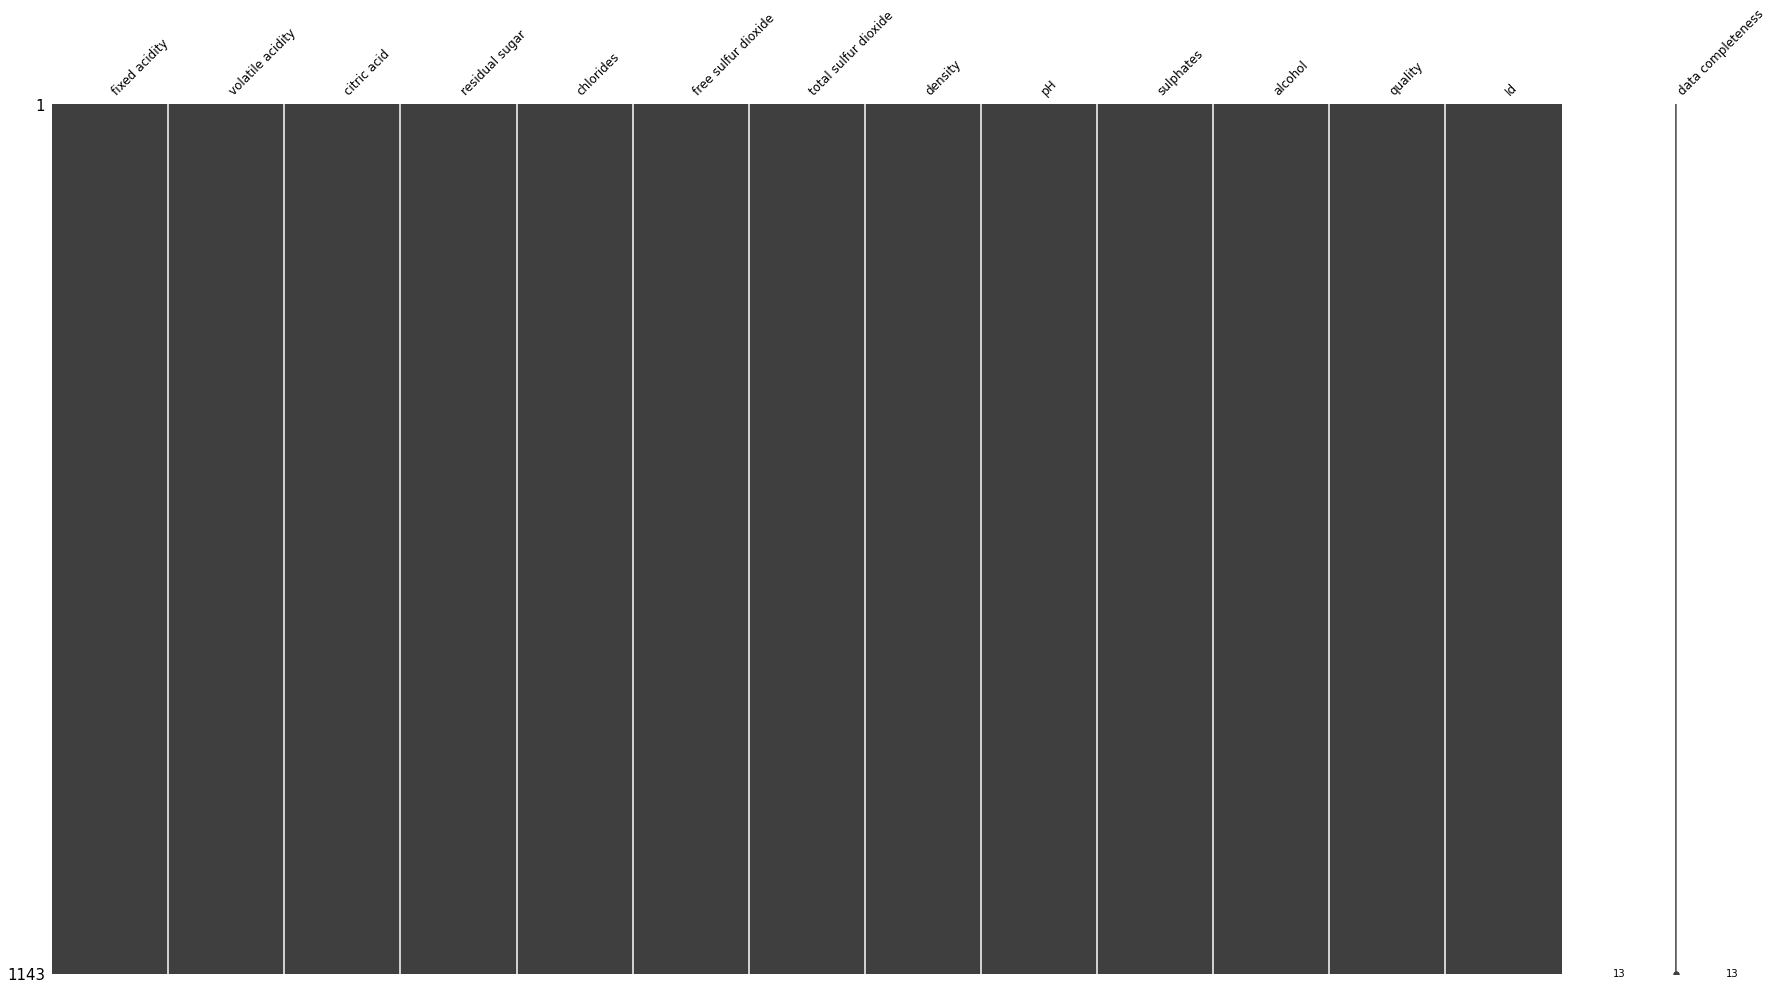

In [13]:
msno.matrix(df,labels=[df.columns],figsize=(30,16),fontsize=12)

### Checking the data distribution of each Continuous variable
<a class="anchor" id="sec2.2"></a>

<html>
<p style="color:blue;font-size:150%;">
    <b>Skewed Distribution-</b></p>
<p style="border:4px solid blue;color:black;background-color:red;">
    <img src="https://www.ijamhrjournal.org/articles/2014/1/1/images/IntJAdvMedRes_2014_1_1_30_134449_u5.jpg" alt="Computer man" style="width:800px;height:300px;"/>
    <b>What is skewed distribution?</b><br>
    If one tail is longer than another, the distribution is skewed. These distributions are sometimes called asymmetric or asymmetrical distributions as they don’t show any kind of symmetry. Symmetry means that one half of the distribution is a mirror image of the other half. For example, the normal distribution is a symmetric distribution with no skew. The tails are exactly the same.<br>
    <b>Left Skewed or Negatively Skewed</b>:-A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions.(Mean&lt;Median&lt;Mode)<br>
    <b>Right Skewed or Positively Skewed</b>:-A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions.(Mean&gt;Median&gt;Mode)<br>
    <b>Symmetric Distribution:-</b>A symmetric distribution is a type of distribution where the left side of the distribution mirrors the right side(Mean=Median=Mode).ex-Normal Distribution
    </p>
    </html>

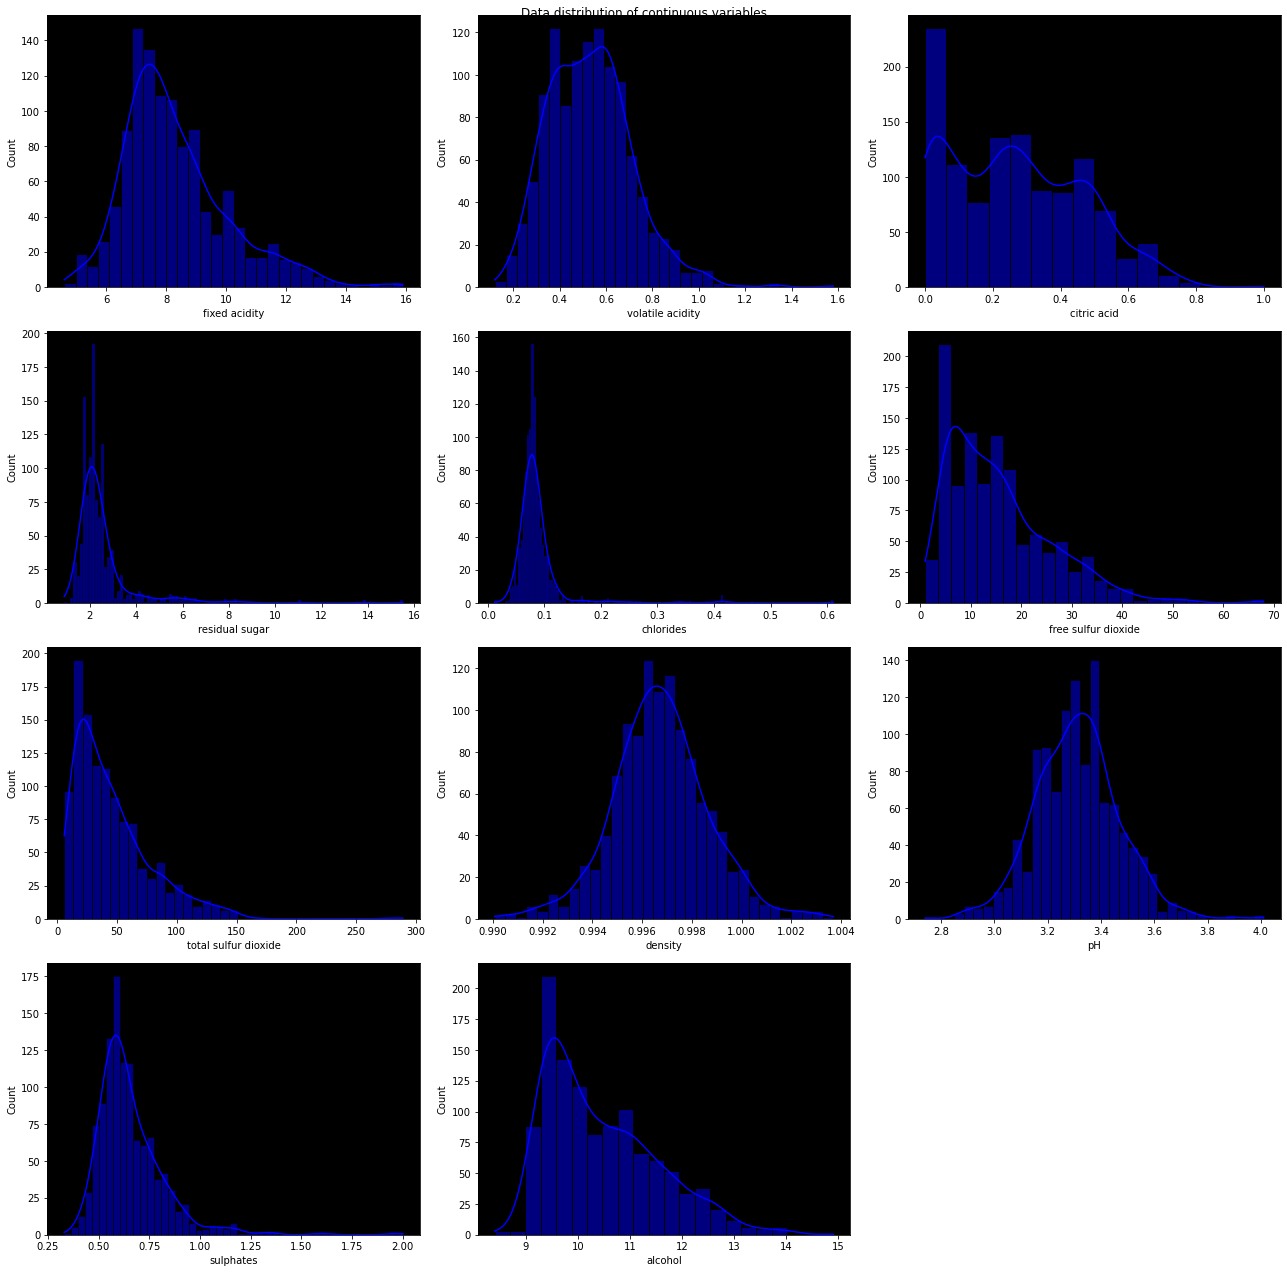

In [15]:
plt.figure(figsize=(18,18))
for i,col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor']='black'
    ax=plt.subplot(4,3,i+1)
    sns.histplot(data=df,x=col,ax=ax,color='blue',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()
    

#### So here we see that lots of attributes are positively or negatively distributed.

### Box-Plot
<a class="anchor" id="sec2.3"></a>

<html>
    <p style="color:blue;font-size:150%;">
        <b> Box-plot</b></p>
    <p style="border:4px solid blue;color:black;background-color:red;">
        <b> What is Box Plot?</b>
        <img src="https://help.ezbiocloud.net/wp-content/uploads/2020/04/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA-2020-04-19-%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB-9.41.35.png"  alt="Computer man" style="width:800px;height:300px;"/>
         In descriptive statistics, a box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.</p><br>
    <p style="border:4px solid blue;color:black;background-color:red;">
        <b> How to interpret boxplot </b><br>
         *Median: In the box plot, the median is displayed rather than the mean.<br>
           * Q1: The first quartile (25%) position.<br>
  * Q3: The third quartile (75%) position.<br>
  *  Interquartile range (IQR): a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles. It represents how 50% of the points were dispersed.<br>
* Lower and upper 1.5*IQR whiskers: These represent the limits and boundaries for the outliers.<br>
  *  Outliers: Defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR. Outliers are displayed as dots or circles.
    </p>
    </html>
        

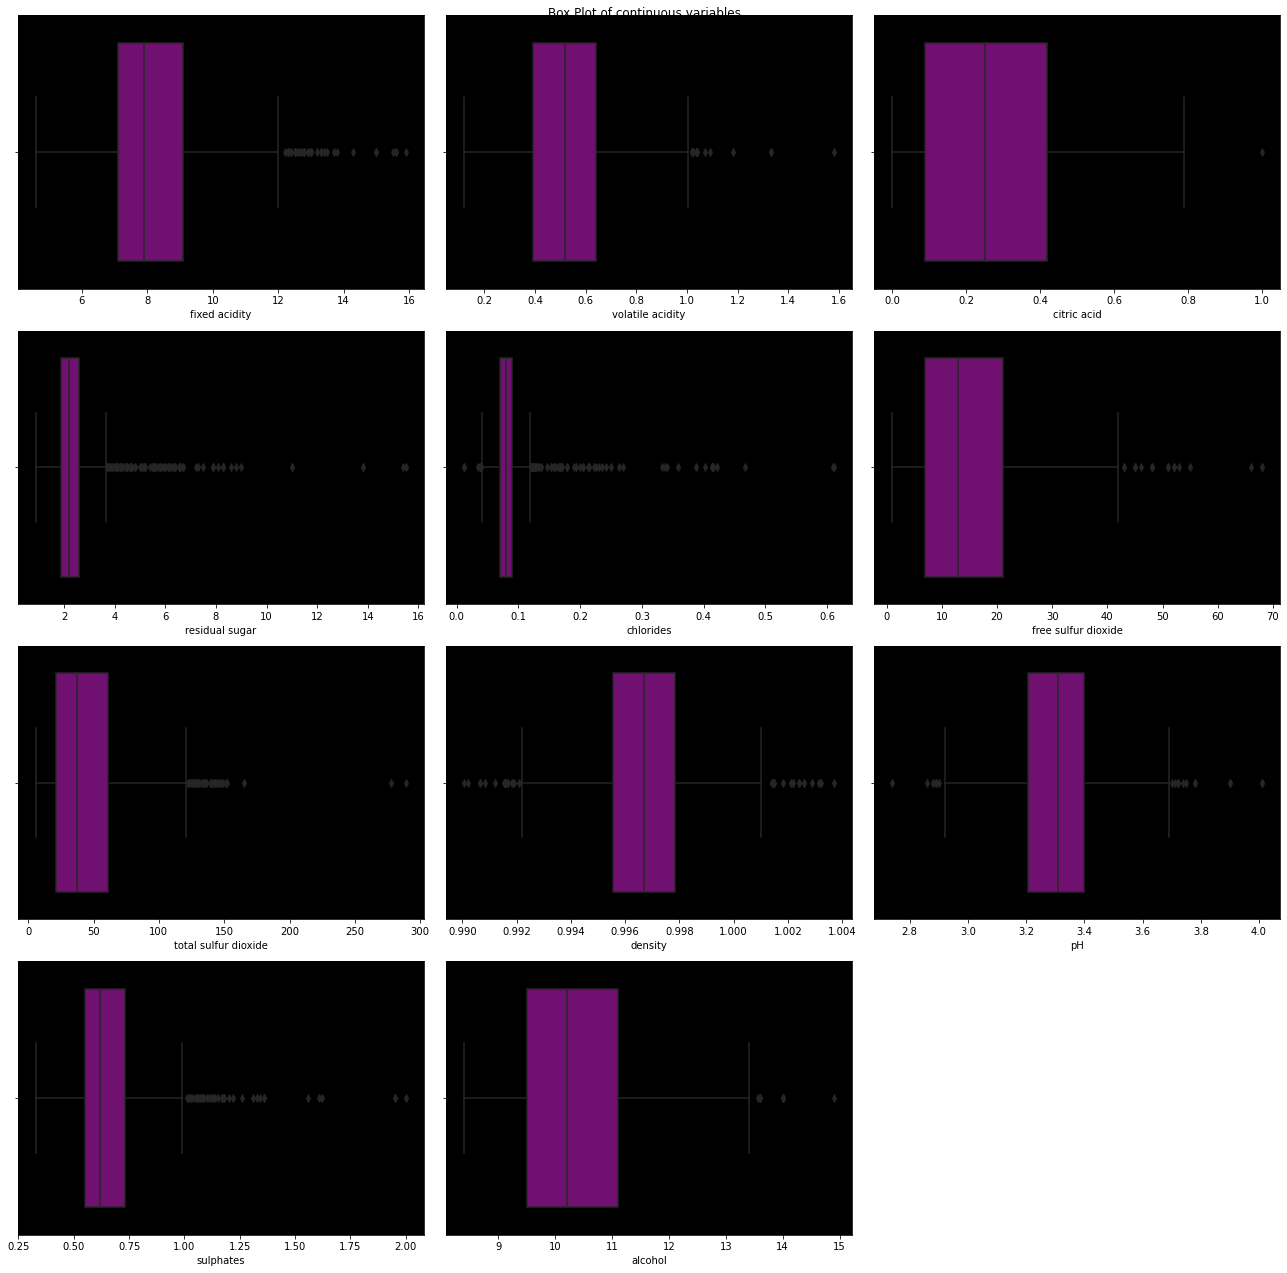

In [17]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor']='black'
    ax=plt.subplot(4,3,i+1)
    sns.boxplot(data=df , x=col, ax=ax,color='purple')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

In [19]:
#Creating a function to replace the outliers in the dataset from median.
def outlier_treating(data,var):
    df=data.copy()# creating a copy of the data
    def outlier_detector(data):#detecting the outlier
        outliers=[]
        q1=np.percentile(data,25)
        q3=np.percentile(data,75)
        IQR=q3-q1
        lb=q1-(IQR*1.5)
        ub=q3+(IQR*1.5)
        for i,j in enumerate(data):
            if(j<lb or j>ub):
                outliers.append(i)
        return outliers
    for i in var:
            out_var=outlier_detector(df[i])#calling outlier_detector function
            df.loc[out_var,i]=np.median(df[i])#replacing the outliers from median
    return df   

In [20]:
#select the variables that have outliers
var=list(df.select_dtypes(include=['float64']).columns)

In [21]:
df=outlier_treating(df,var)

### Data distribution after treating outliers
<a class="anchor" id="sec2.5"></a>

<html>
    <p style="border:4px solid blue;color:black;background-color:red">
        After treating the outliers the distribution plot looks more symmetrical.</p>
    </html>

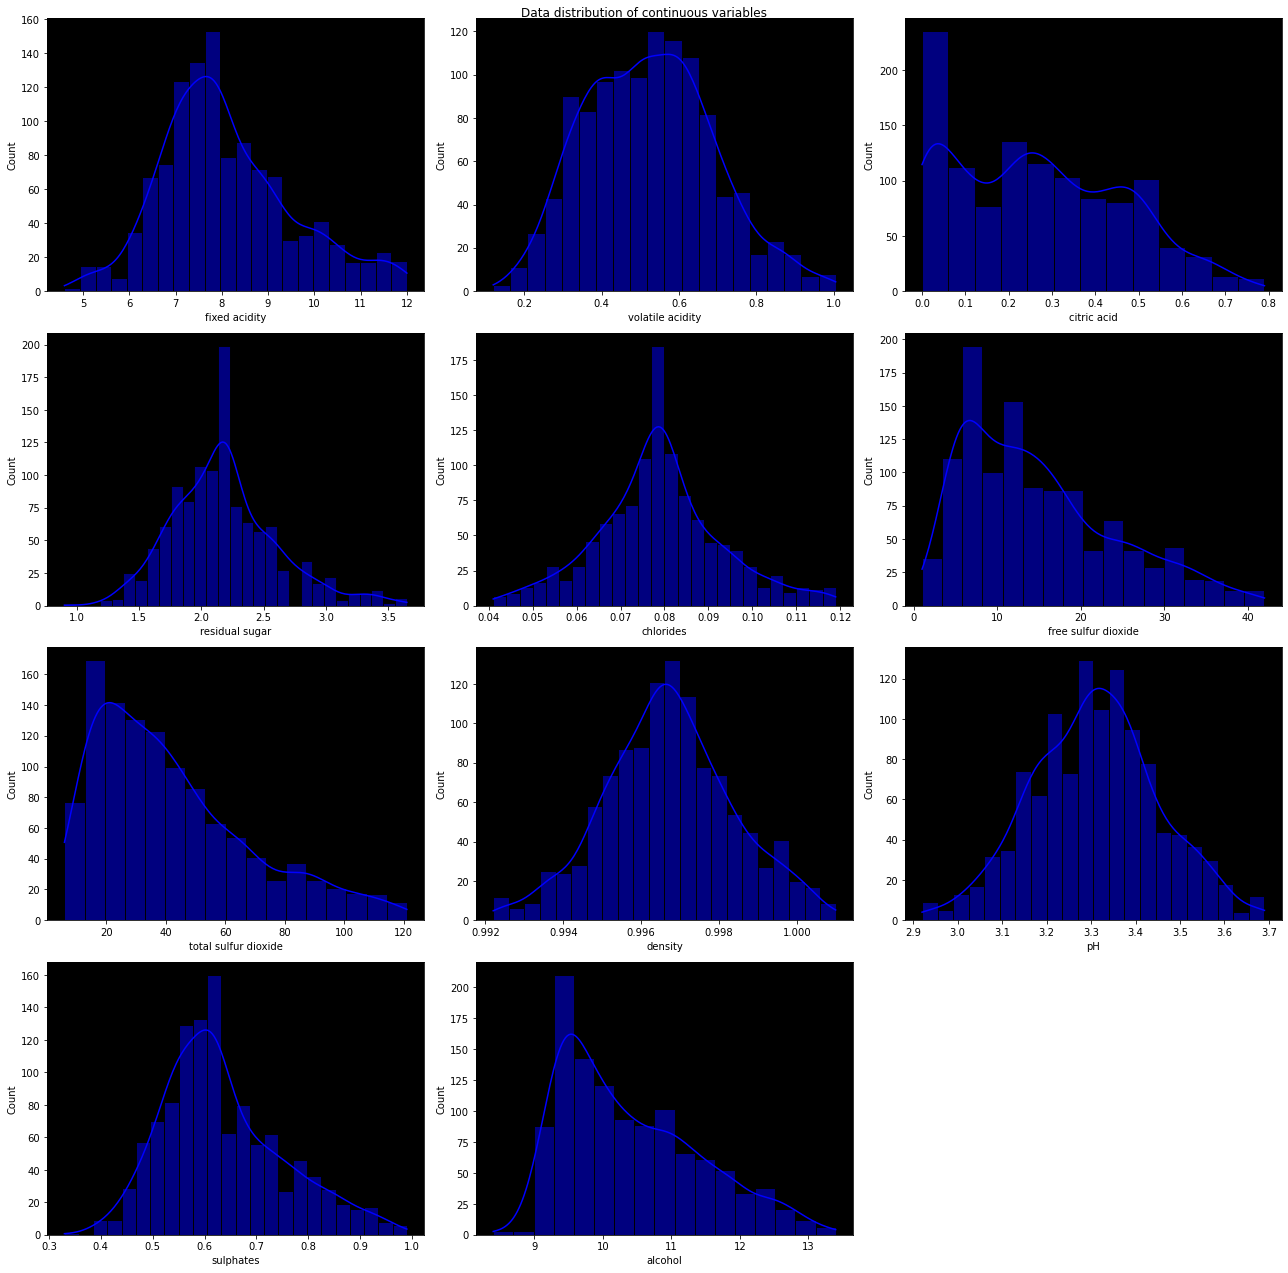

In [22]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='blue',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

### Box-Plot after treating outliers
<a class="anchor" id="sec2.5"></a>

<html>
<p style="border:4px solid blue;color:black;background-color:red">
    Our boxplot looks better after treating the outliers
    </p>
    </html>

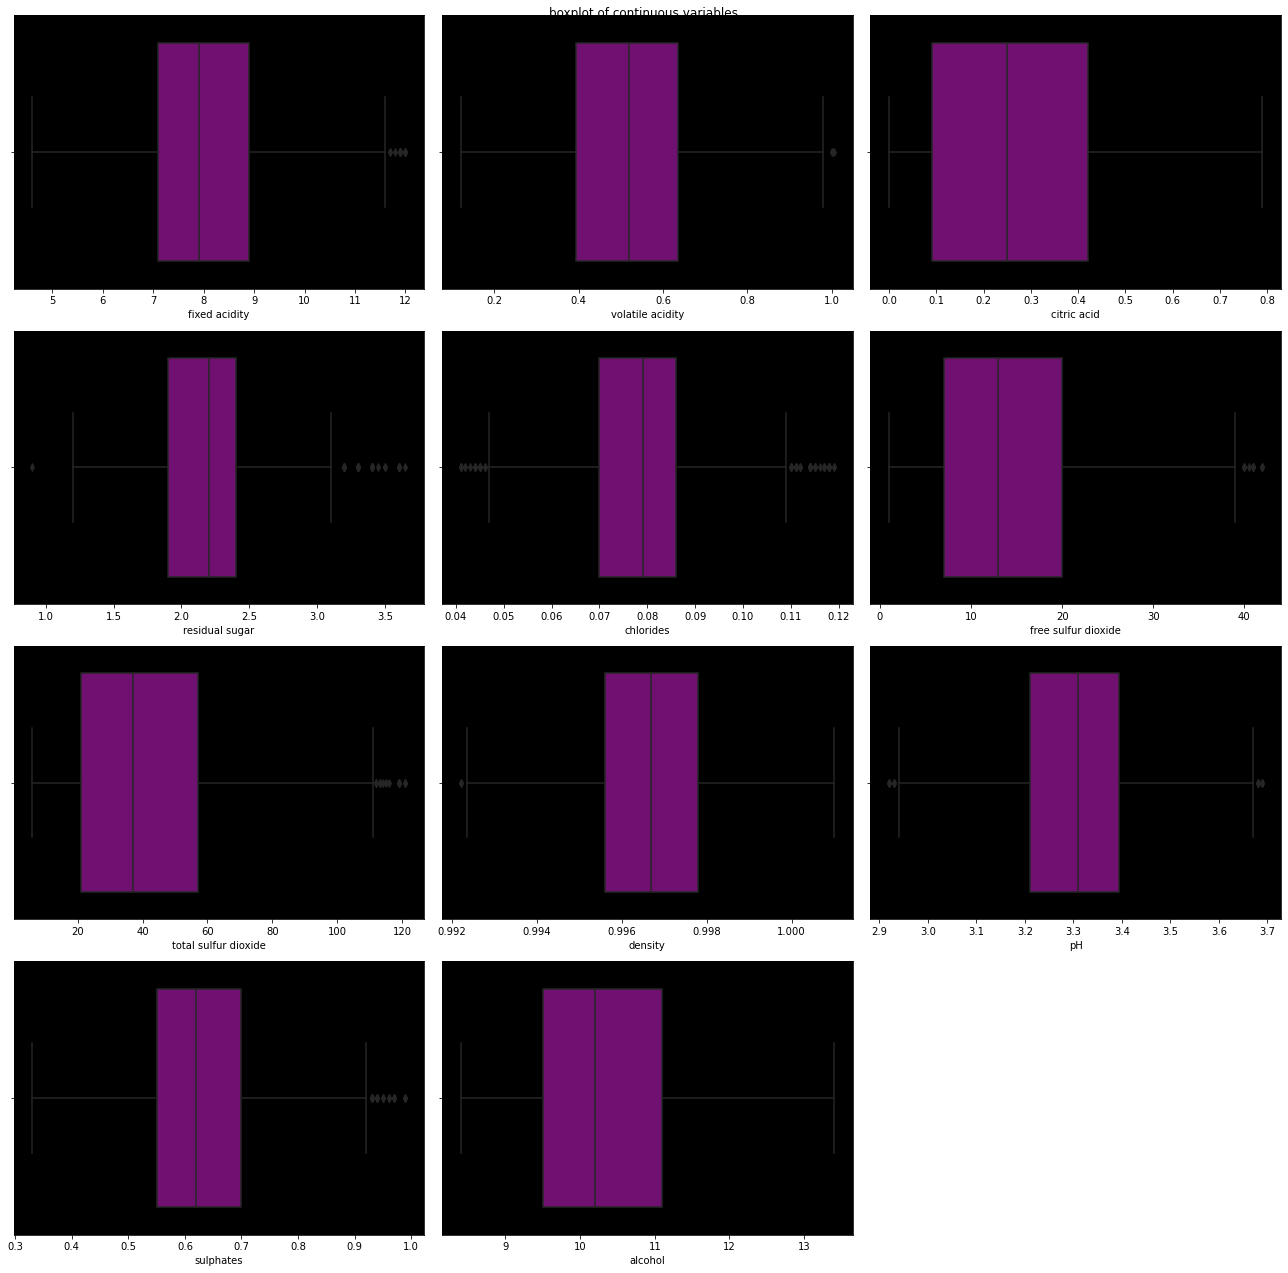

In [23]:
plt.figure(figsize=(18, 18))
for i,col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor']='black'
    ax=plt.subplot(4,3,i+1)
    sns.boxplot(data=df, x=col, ax=ax, color='purple')
plt.suptitle('boxplot of continuous variables')
plt.tight_layout()

### Heatmap
<a class="anchor" id="sec2.6"></a>

<htlm>
    <p style="border:4px solid blue;color:black;background-color:red">
        Heatmap is use to interpret the correlation between the variabes
    </p>
    </html>

<AxesSubplot:>

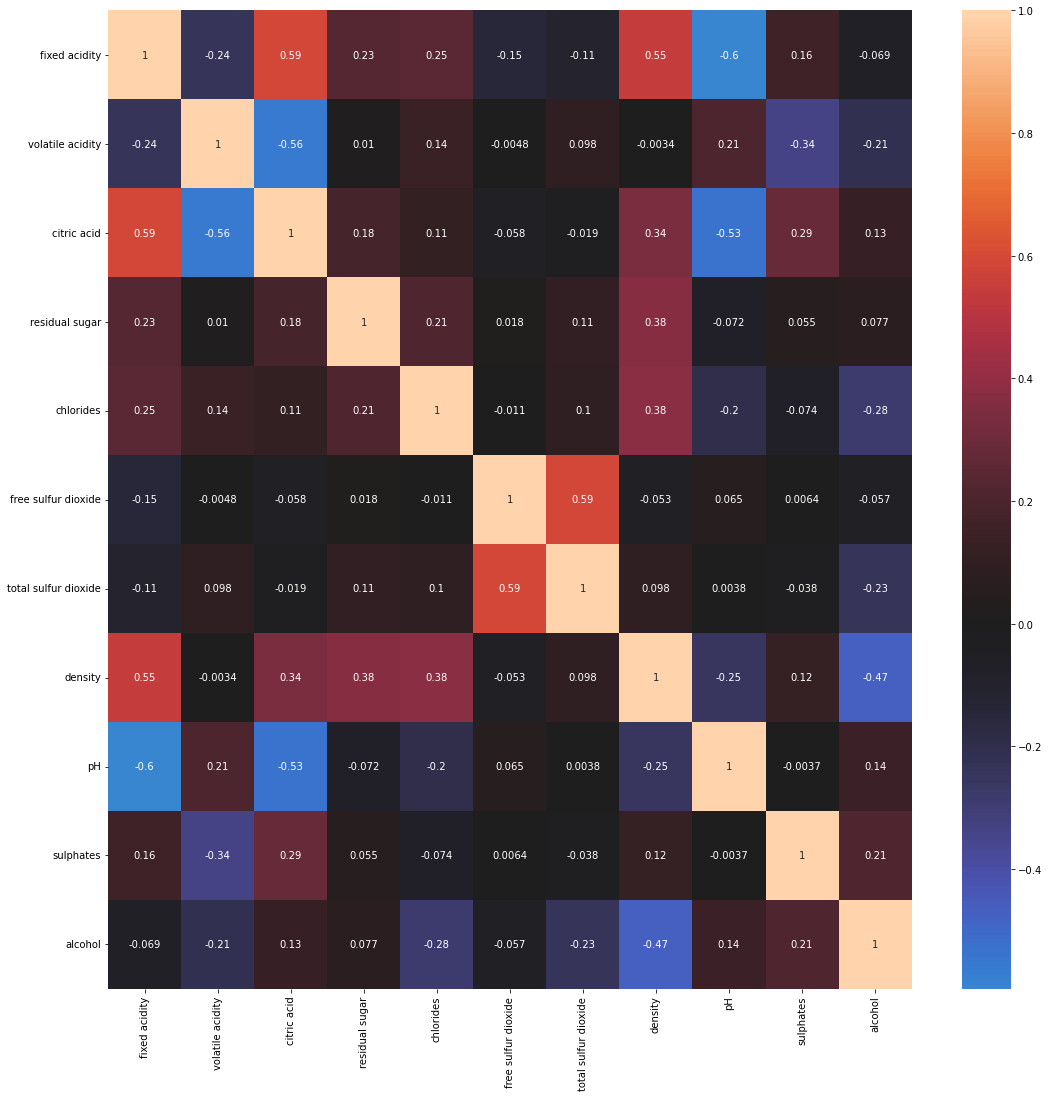

In [24]:
plt.figure(figsize=(18, 18))
sns.heatmap(df.select_dtypes(include=['float64']).corr(),annot=True,center=0)

### Bar plot
<a class="anchor" id="sec2.7"></a>

<html>
    <p style="border:4px solid blue;color:blue;background-color:red">
        Here we can look at each plot and see the contribution of each feature to the different quality of wine.</p>
    </html>

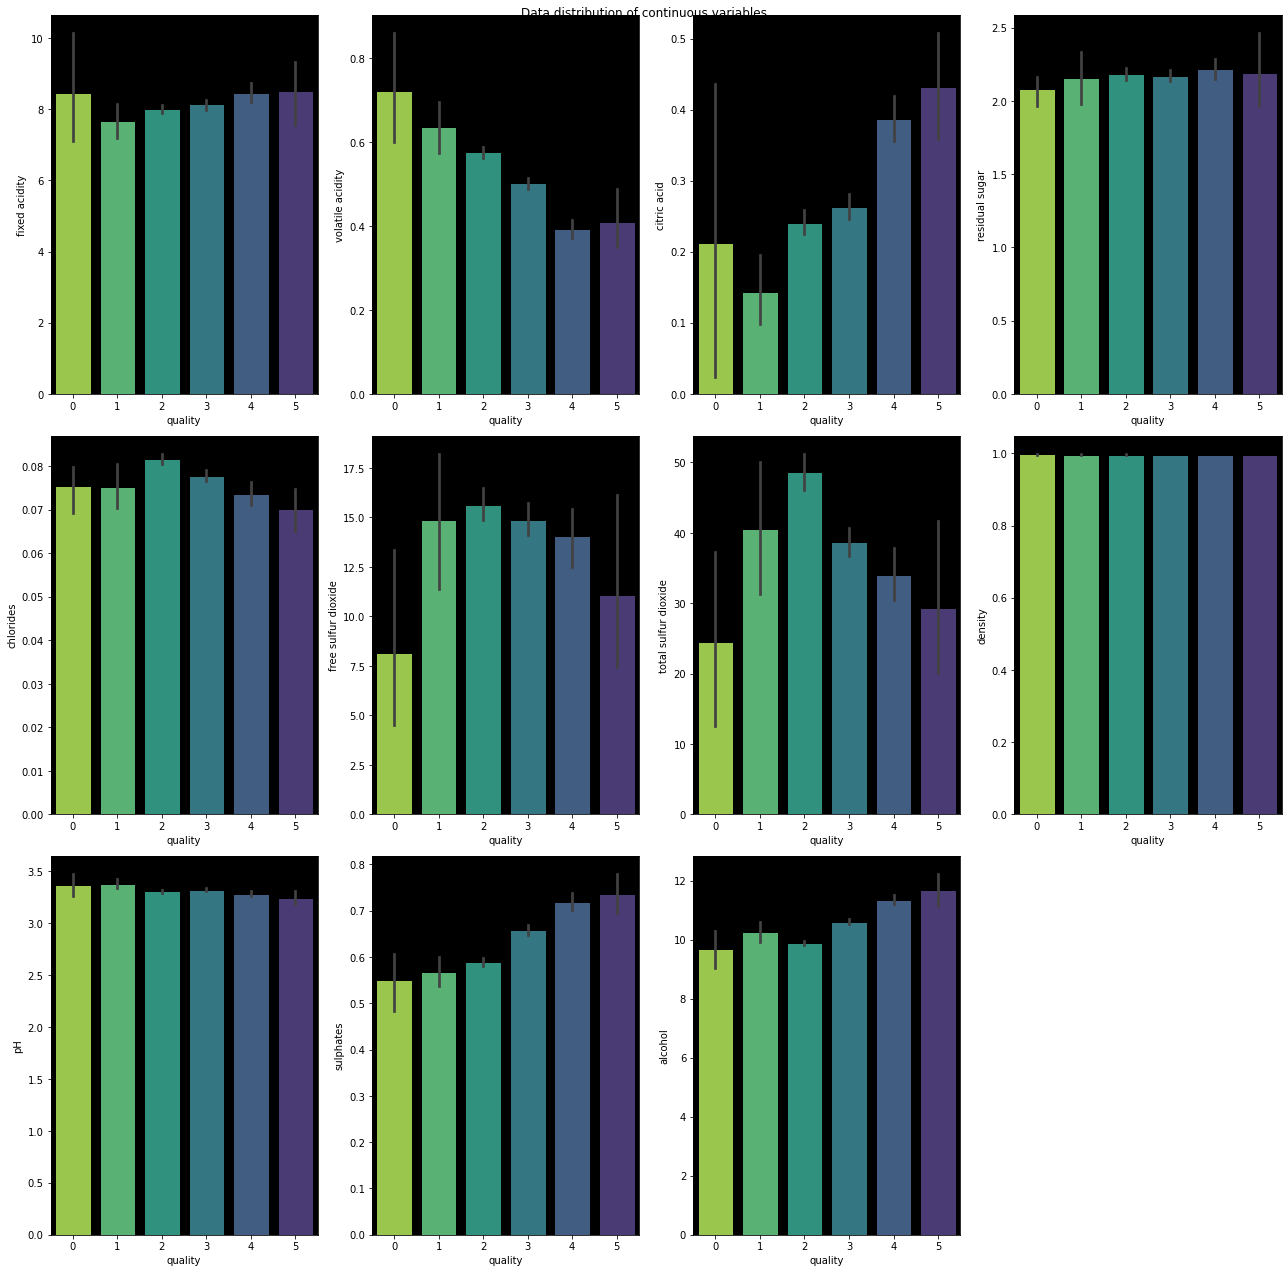

In [25]:
plt.figure(figsize=(18, 18))
for i,col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor']='black'
    ax=plt.subplot(3,4, i+1)
    sns.barplot(data=df, x='quality', y=col, ax=ax, edgecolor="black", palette='viridis_r')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

### Analysing the target variable
<a class="anchor" id="sec2.4"></a>

<html>
<p style="color:blue;font-size:150%;">
    <b>Balanced and Unbalanced data-</b></p>
    <img src="https://lh5.googleusercontent.com/KehyaPcGqhC5JHTYIHGbhmYcmwqoqM7bwsqlbwB8j9lkpQm7O3-LDteJn2Z6SqiWX2c=w2400" alt="Computer man" style="width:800px;height:300px;"/>
<p style="border:4px solid blue;color:black;background-color:red;">
    <b>What is Balanced data?</b><br>
    Balanced data refers to those types of datasets where the target class has an even distribution of observations, i.e all class label have equal number of observations in the dataset.</p>
<p style="border:4px solid blue;color:black;background-color:red;">
    <b>What is Unbalanced data?</b><br>
    Unbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.</p>
    </html>

### Pie chart shows that the target class is unbalanced
<a class="anchor" id="sec2.8"></a>

<html>
    <p style="border:4px solid blue;color:black;background-color:red">
      Pie chart tells us that most of samples in the target class are quality 2,quality 3 and quality 4.This is a case of unbalanced data so during train and test split we will use startified sampling to overcome the problem of unbalanced data.  

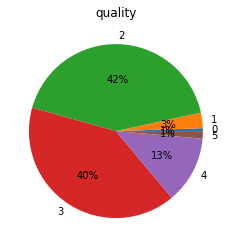

In [27]:
target_var=pd.crosstab(index=df['quality'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('quality')
plt.show()

### Count plot shows that the target variable is unbalanced
<a class="anchor" id="sec2.9"></a>

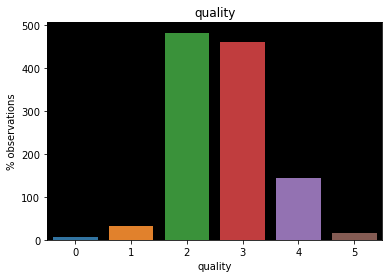

In [28]:
sns.barplot(x=target_var.index,y=target_var['% observations'])
plt.title('quality')
plt.show()

In [29]:
X=df.iloc[:,0:-2]
y=df.iloc[:,-2]

In [31]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)

### Feature Selection 
<a class="anchor" id="sec3"></a>

<html>
<p style="color:blue;font-size:150%;">
    <b>Feature Selection-</b></p>
<p style="border:4px solid blue;color:black;background-color:red;">
    Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable..</p>
<img src="https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png" alt="Computer man" style="width:800px;height:300px;"/>
 </html>

<html>
<p style="border:4px solid blue;color:black;background-color:red;">
    In our dataset we have numerical Input variable and Categorical Output variable.so we will use <b>ANOVA</b> for the feature selection.</p>

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  #ANOVA

In [33]:
fs=SelectKBest(score_func=f_classif, k='all')
fs.fit(X,y)

SelectKBest(k='all')

In [34]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100
feature_contribution

array([ 1.90455676, 23.75439679,  9.89245506,  0.55688108,  2.7654119 ,
        3.65778653,  4.15199678,  4.81709979,  5.19430246, 18.17702021,
       25.12809264])

### Feature Importance Graph
<a class="anchor" id="sec3.1"></a>

fixed acidity:1.90%
volatile acidity:23.75%
citric acid:9.89%
residual sugar:0.56%
chlorides:2.77%
free sulfur dioxide:3.66%
total sulfur dioxide:4.15%
density:4.82%
pH:5.19%
sulphates:18.18%
alcohol:25.13%


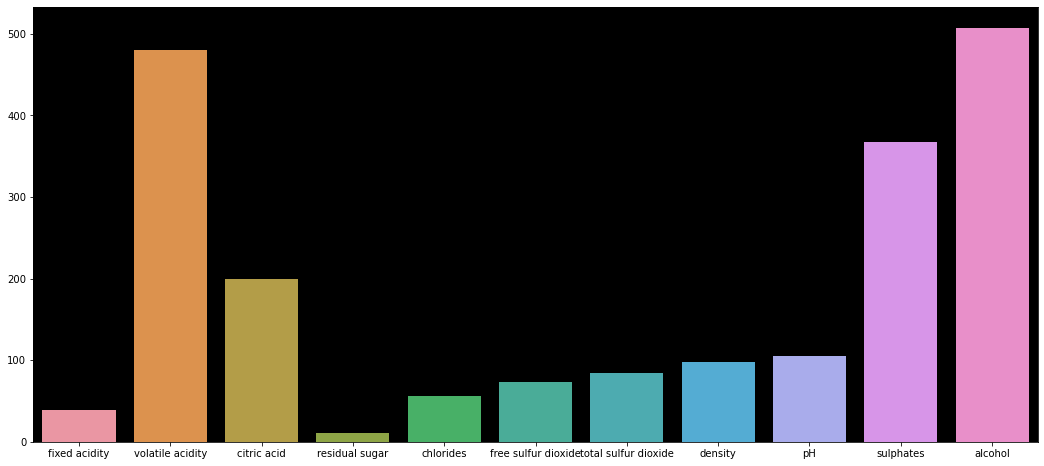

In [35]:
for i,j in enumerate(X.columns):
    print(f'{j}:{feature_contribution[i]:.2f}%')
plt.figure(figsize=(18,8))
sns.barplot(x=X.columns,y=fs.scores_)
plt.show()

<html>
<p style="border:4px solid blue;color:black;background-color:red;">
    From the above bar garph we can see the feature importance and we will include only those features which are more important for our model.</p>
    </html>

In [36]:
X1=X[['volatile acidity','citric acid','chlorides','total sulfur dioxide','density','sulphates','alcohol']]

### Splitting our datatset into train and test set
<a class="anchor" id="sec4"></a>

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.10,stratify=y,random_state=0)

### Feature Scaling 
<a class="anchor" id="sec5"></a>

<html>
<p style="color:blue;font-size:150%;">
    <b>Feature Scaling-</b></p>
<p style="border:4px solid blue;color:black;background-color:red;">
    <b>What is Normalization?</b><br>
    Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.<br>
    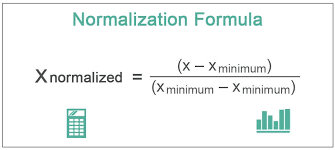
    <b>What is Standardization?</b><br>
    Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
        <img src="https://lh6.googleusercontent.com/_y4dtry_8ImYjqLTXcH68ZpB1--Iea2n2m08d-GLpbTQ4VSREwy3v1PcX8dGQwLE9PE=w2400" alt="Computer man" style="width:800px;height:200px;"/></p>
    </html>

<html>
<p style="border:4px solid blue;color:black;background-color:red;">
    Here we are going to use <b>Standardization</b>.</p>
    </html>

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Modeling
<a class="anchor" id="sec6"></a>

### Performance Measures for Multi-Class

<html>
<p style="border:4px solid blue;color:black;background-color:red;">
    <b>Confusion Matrix-</b><br>
    <img src="https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png?w=1024" alt="Computer man" style="width:800px;height:300px;"/>
    <br>
    <b>Other Multiclass Classification Metrics:</b><br>
    <img src="https://lh6.googleusercontent.com/rLIeVDOU5r4vAL1wPwWM0NtxKMUTzgkgOVZkkGiXxMC1VtCimZSrwLTYeEOap5Js8MY=w2400" alt="Computer man" style="width:800px;height:300px;"/>
    </p>
    </html>

### K-fold Cross Validation

<html>
<p style="color:blue;font-size:150%;">
    <b>K-fold Cross validation-</b></p>
<p style="border:4px solid blue;color:black;background-color:red;">
    <b>What is Cross Validation?</b><br>
    Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.<br>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1920px-K-fold_cross_validation_EN.svg.png" alt="Computer man" style="width:800px;height:400px;"/>
    </p>
    </html>

In [41]:
#importing different classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [42]:
#creating a dictionary for storing different models accuracy
model_comparison={}

### Decision Tree
<a class="anchor" id="sec6.1"></a>

In [43]:
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=5)
print("Cross val Accuracy : {:.2f}%".format(accuracies.mean()*100))
print("Cross val Standard Deviation : {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Decision Tree']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 80.34%
Model F1-Score : 80.71%
Cross val Accuracy : 75.81%
Cross val Standard Deviation : 0.78 %
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        51
           1       0.88      0.78      0.82        54
           2       0.60      0.69      0.64        42
           3       0.56      0.60      0.58        45
           4       0.86      0.84      0.85        50
           5       0.92      0.92      0.92        48

    accuracy                           0.80       290
   macro avg       0.80      0.80      0.80       290
weighted avg       0.81      0.80      0.81       290



### KNN 
<a class="anchor" id="sec6.2"></a>

In [44]:
classifier=KNeighborsClassifier( n_neighbors=5)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['KNN']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 76.90%
Model F1-Score : 79.11%
Cross Val Accuracy: 75.57 %
Cross Val Standard Deviation: 1.50 %
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      0.69      0.81        68
           2       0.50      0.60      0.55        40
           3       0.27      0.50      0.35        26
           4       0.86      0.76      0.81        55
           5       1.00      0.94      0.97        51

    accuracy                           0.77       290
   macro avg       0.77      0.75      0.75       290
weighted avg       0.83      0.77      0.79       290



### SVM
<a class="anchor" id="sec6.6"></a>

In [45]:
classifier=SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Support Vector Classifier']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 72.76%
Model F1-Score : 73.44%
Cross Val Accuracy: 71.32 %
Cross Val Standard Deviation: 1.04 %
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        53
           1       0.77      0.70      0.73        53
           2       0.56      0.56      0.56        48
           3       0.40      0.45      0.42        42
           4       0.65      0.78      0.71        41
           5       0.98      0.89      0.93        53

    accuracy                           0.73       290
   macro avg       0.73      0.72      0.72       290
weighted avg       0.75      0.73      0.73       290



### Random Forest
<a class="anchor" id="sec6.7"></a>

In [46]:
classifier=RandomForestClassifier(n_estimators=200 , random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Random Forest']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 85.86%
Model F1-score : 86.44%
Cross Val Accuracy: 84.36 %
Cross Val Standard Deviation: 1.31 %
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      0.87      0.92        54
           2       0.69      0.72      0.70        46
           3       0.56      0.71      0.63        38
           4       0.92      0.85      0.88        53
           5       1.00      0.98      0.99        49

    accuracy                           0.86       290
   macro avg       0.86      0.85      0.85       290
weighted avg       0.87      0.86      0.86       290



### Xg Boost
<a class="anchor" id="sec6.6"></a>

In [47]:
classifier=XGBClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Xg Boost']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 83.45%
Model F1-Score : 84.00%
Cross Val Accuracy: 83.28 %
Cross Val Standard Deviation: 0.71 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.98      0.89      0.93        53
           2       0.58      0.70      0.64        40
           3       0.56      0.60      0.58        45
           4       0.90      0.83      0.86        53
           5       0.98      0.94      0.96        50

    accuracy                           0.83       290
   macro avg       0.83      0.83      0.83       290
weighted avg       0.85      0.83      0.84       290



## Model Comparison
<a class="anchor" id="sec7"></a>

In [48]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Random Forest,85.86%,86.44%,84.36%,1.31%
Xg Boost,83.45%,84.00%,83.28%,0.71%
Decision Tree,80.34%,80.71%,75.81%,0.78%
KNN,76.90%,79.11%,75.57%,1.50%
Support Vector Classifier,72.76%,73.44%,71.32%,1.04%
